In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import xarray as xr

import regionmask

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.feature as cfeat

import netCDF4

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

# Import data and process

In [3]:
df = pd.read_csv(f'../optimization_model/good_model_inputs/inputs_gen_normal.csv')
df.loc[df['FuelType'] == 'Pumps', 'FuelType'] = 'Hydro' #change pumps to hydro label


In [4]:
fuel_type=df.loc[(df['FuelType'].isin(['Coal','Nuclear','NaturalGas']))].groupby(['ORISCode']).first()['FuelType']
color_dict = {'NaturalGas':'xkcd:light navy blue', 'Biomass':'xkcd:brown', 'Coal':'xkcd:chocolate brown', 
              'Hydro':'xkcd:dark blue', 'LF Gas':'xkcd:purple', 'Non-Fossil':'xkcd:pink',
       'Nuclear':'xkcd:red', 'Oil':'xkcd:dark orange', 
              'Pet. Coke':'xkcd:maroon', 'Solar':'xkcd:yellow', 
              'Wind':'xkcd:light blue', 'MSW':'xkcd:dark green', 
              'Fwaste':'xkcd:dust', 'Waste Coal':'xkcd:terracotta', 'Geothermal':'xkcd:dark coral'}
color_dict_short = {'NaturalGas':'xkcd:light navy blue', 'Nuclear':'xkcd:red', 'Coal':'xkcd:chocolate brown'}
color_list = [color_dict[fuel] for fuel in fuel_type]


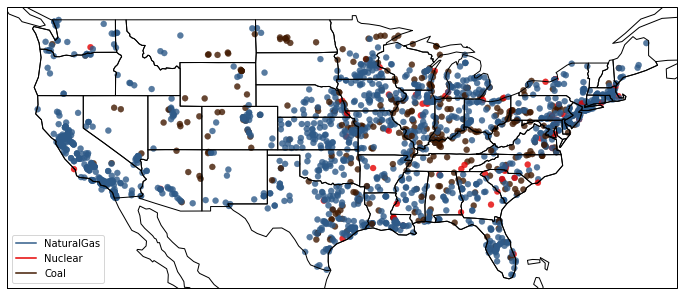

In [5]:
fig = plt.figure(figsize=[12,9])

###### Create axes ######
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeat.STATES)

###### observations #######
#create lat and lon for observations
lat_o = df.loc[(df['FuelType'].isin(['Coal','Nuclear','NaturalGas']))].groupby(['ORISCode']).first()['LAT']
lon_o = df.loc[(df['FuelType'].isin(['Coal','Nuclear','NaturalGas']))].groupby(['ORISCode']).first()['LON']
#color based on the 
fuel_type=df.loc[(df['FuelType'].isin(['Coal','Nuclear','NaturalGas']))].groupby(['ORISCode']).first()['FuelType']
#PCM parameters and plot for observations
PCM_o=ax.scatter(lon_o, lat_o, c=color_list, transform=ccrs.PlateCarree(),linewidth=.3, marker = 'o', alpha = 0.8)
for key, val in color_dict_short.items():
    plt.plot([],[],label=key, color=val)
plt.legend();